In [1]:
from pytrends.request import TrendReq

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
#List 1 - 5 search terms
search = ["Star Wars: Galaxy's Edge"]

pytrends = TrendReq()
pytrends.build_payload(search, 
                       timeframe='2019-05-31 2020-07-19',
                       geo='US')

In [3]:
df = pytrends.interest_over_time()

In [4]:
df.head()

,Star Wars: Galaxy's Edge,isPartial
date,,
2019-06-02,100,False
2019-06-09,83,False
2019-06-16,65,False
2019-06-23,25,False
2019-06-30,38,False


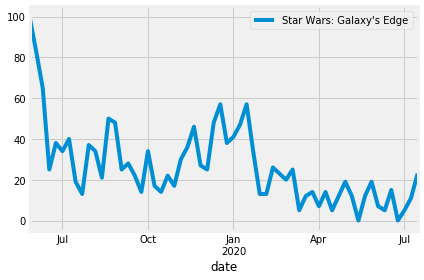

In [5]:
df.plot()

plt.tight_layout()

plt.savefig('images/monthly_searches.png', dpi=300)

In [7]:
df_regional = pytrends.interest_by_region()

df_regional = df_regional.sort_values("Star Wars: Galaxy's Edge", ascending=False)

df_regional

,Star Wars: Galaxy's Edge
geoName,
Florida,100
Utah,89
California,72
Ohio,69
Arizona,54
Oregon,50
Nevada,38
Illinois,31
South Carolina,31


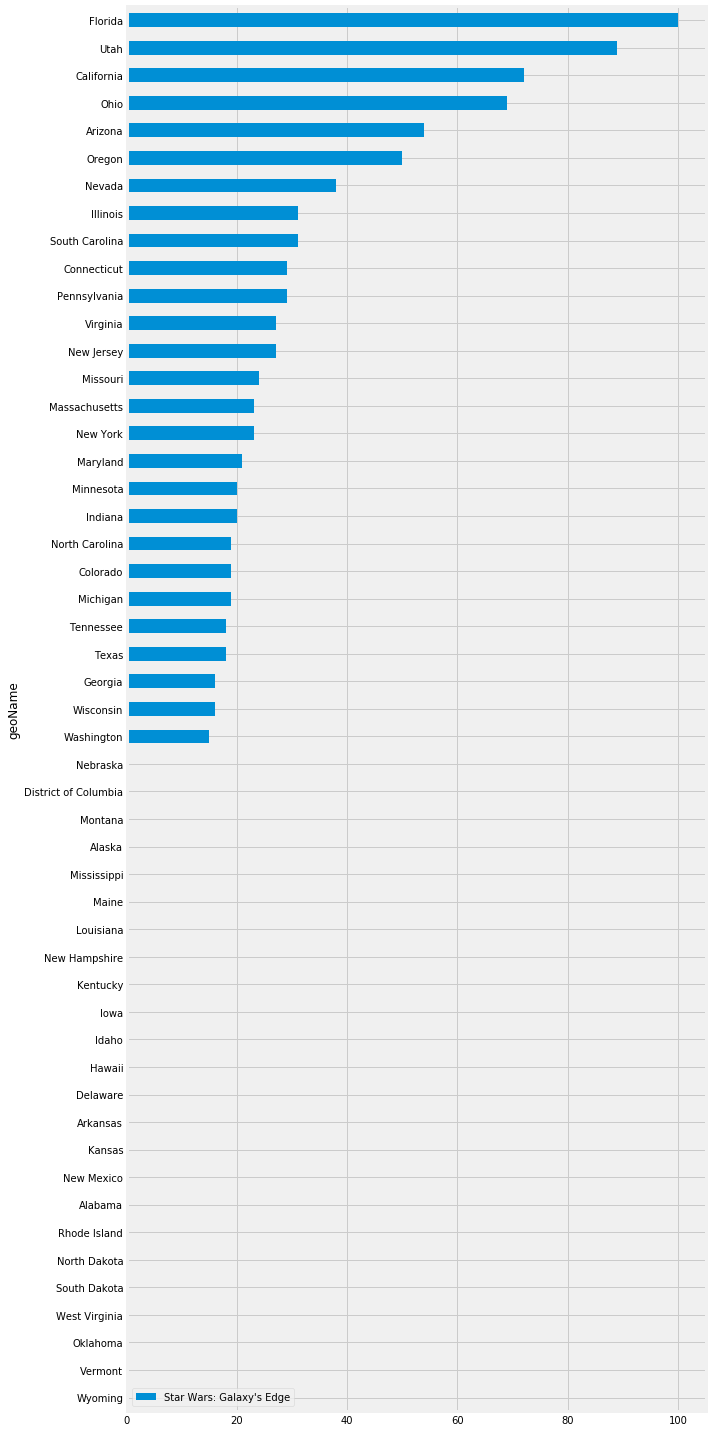

In [8]:
df_regional.sort_values("Star Wars: Galaxy's Edge",ascending=True).plot.barh(figsize=(10,20))

plt.tight_layout()

plt.savefig('images/state_searches.png', dpi = 300)

In [9]:
fp = "data/geo_data/cb_2018_us_state_500k.shp"

map_df = gpd.read_file(fp)
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


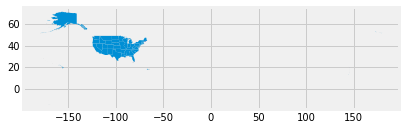

In [10]:
map_df.plot()

In [11]:
merged_df = map_df.set_index('NAME').join(df_regional)

merged_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,Star Wars: Galaxy's Edge
NAME,,,,,,,,,,
Mississippi,28,01779790,0400000US28,28,MS,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0.0
North Carolina,37,01027616,0400000US37,37,NC,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",19.0
Oklahoma,40,01102857,0400000US40,40,OK,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0.0
Virginia,51,01779803,0400000US51,51,VA,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",27.0
West Virginia,54,01779805,0400000US54,54,WV,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.0


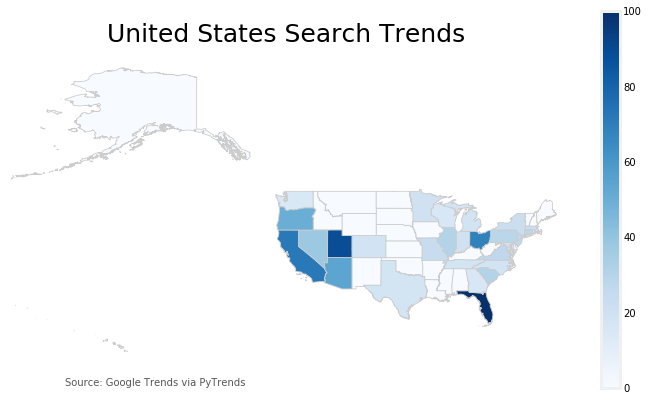

In [12]:
# set a variable that will call whatever column we want to visualise on the map
variable = "Star Wars: Galaxy's Edge"

#Choropleth Range
vmin, vmax = 0, 100

#Create Figure and Axis
fig, ax = plt.subplots(1, figsize=(10, 6))

#Create Map
merged_df.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")

#Title
ax.set_title("United States Search Trends", \
              fontdict={'fontsize': "25",
                        'fontweight' : "3"})

#Zoom Into Map
xlim = ([-180,-65])
ylim = ([20,75])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.axis("off")

#Annotation
ax.annotate("Source: Google Trends via PyTrends",
           xy=(0.1, .08), xycoords="figure fraction",
           horizontalalignment="left", verticalalignment="top",
           fontsize=10, color="#555555")

#Legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.tight_layout()

plt.savefig("images/trend_map.png", dpi = 300)

# Related Search Terms

In [13]:
#Select 1-5 search terms
pytrends.build_payload(["Star Wars: Galaxy's Edge"])

In [14]:
related = pytrends.related_queries()

In [15]:
related.keys()

dict_keys(['Star Wars  Galaxys Edge'])

In [16]:
related['Star Wars  Galaxys Edge'].keys()

dict_keys(['top', 'rising'])

In [17]:
related['Star Wars  Galaxys Edge']['top'].head(25)

,query,value
0,star wars land,100


In [18]:
related['Star Wars  Galaxys Edge']['rising'].head(25)

,query,value
0,star wars land,165000
